In [28]:
%pylab inline
import gromacs.formats
import pandas as pd
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as imgplt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.gridspec as gridspec

from Bio.PDB import PDBParser
from Bio.PDB.DSSP import DSSP

rc('font', family='times new roman', size=14,weight='bold')
tied_name=['r1','r2','r3','r4','r5','r6','r7','r8','r9','r10']
open_data_path_R='/home/dldx/gromacs/R-H/new-R_unbound/'
close_data_path_R='/home/dldx/gromacs/R-H/new-R_bound/'
open_data_path_H='/home/dldx/gromacs/R-H/new-H_unbound/'
close_data_path_H='/home/dldx/gromacs/R-H/new-H_bound/'

Populating the interactive namespace from numpy and matplotlib


In [2]:
# R 
# v1/v2(LNC - YRL)  98-168
# v3(PNN - RQA)   274-303
p = PDBParser()
structure = p.get_structure("test", "/home/dldx/gromacs/R-H/new-R_unbound/r2_unbound.pdb")
mode = structure[0]
dssp = DSSP(mode, "/home/dldx/gromacs/R-H/new-R_unbound/r2_unbound.pdb",dssp='mkdssp')
for i in range(0,479):
    a_key = list(dssp.keys())[i]
    print(dssp[a_key])

(1, 'E', '-', 1.0, 360.0, -146.4, 0, 0.0, 2, -0.7, 0, 0.0, 0, 0.0)
(2, 'K', '-', 0.7658536585365854, -111.8, 111.1, 2, -0.0, 2, -0.4, 475, -0.0, 0, 0.0)
(3, 'L', '-', 0.6585365853658537, -130.8, 138.7, -2, -0.7, 2, -0.5, 474, -0.1, 476, -0.1)
(4, 'W', 'E', 0.6651982378854625, -127.2, 128.5, 474, -0.9, 474, -2.1, -2, -0.4, 2, -0.3)
(5, 'V', 'E', 0.7112676056338029, -80.8, 137.7, -2, -0.5, 2, -0.4, 472, -0.2, 470, -0.0)
(6, 'T', 'E', 0.36619718309859156, -132.4, 141.0, 470, -2.7, 470, -2.7, -2, -0.3, 2, -0.3)
(7, 'V', 'E', 0.7746478873239436, -91.3, 143.4, -2, -0.4, 2, -0.4, 468, -0.2, 468, -0.2)
(8, 'Y', 'E', 0.4369369369369369, -124.3, 138.4, 466, -3.7, 466, -1.0, -2, -0.3, 2, -0.4)
(9, 'Y', 'S', 0.8423423423423423, -118.4, 137.4, -2, -0.4, 464, -0.2, 1, -0.2, -2, -0.0)
(10, 'G', 'S', 0.5119047619047619, 84.9, 23.8, -2, -0.4, -1, -0.2, 1, -0.3, 463, -0.2)
(11, 'V', '-', 0.34507042253521125, -77.2, 137.5, 461, -2.6, 2, -1.0, -3, -0.3, -1, -0.3)
(12, 'P', '-', 0.8161764705882353, -67.9, 

/home/dldx/anaconda3/lib/python3.8/site-packages/Bio/PDB/PDBParser.py:395: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 3754
  warnings.warn(


In [ ]:
# R
# v1/v2(LNC - YRL)  98-168  原子781-1332
# v3(PNN - RQA)   274-303   原子2129-2357
# α1(NMV-QSL) 68-85
# 再计算  α1-α5(把V1到V5去除)  （NMV）68-97  169-273  304-368(SIW)  (TIT-LTR)389-432   (TFR-SEL)446-462
# 原子区域 542-780  1333-2128  2358-2877  3034-3374  3470-3608
# V4(NSE-RND)369-388 原子 2878-3033
# V5(DGG-GNE)433-445 原子 3375-3469

In [8]:
# H
# v1/v2(LNC - YRL)  98-168
# v3(PNN - RQA)   274-303
p = PDBParser()
structure = p.get_structure("test", "/home/dldx/gromacs/R-H/new-H_bound/H-bound.pdb")
mode = structure[0]
dssp = DSSP(mode, "/home/dldx/gromacs/R-H/new-H_bound/H-bound.pdb",dssp='mkdssp')
for i in range(0,467):
    a_key = list(dssp.keys())[i]
    print(dssp[a_key])

(1, 'E', '-', 1.0, 360.0, 168.4, 0, 0.0, 2, -0.2, 0, 0.0, 4, -0.1)
(2, 'D', '-', 0.8159509202453987, -89.8, 156.2, 2, -0.2, 0, 0.0, 1, -0.1, 0, 0.0)
(3, 'R', 'S', 0.9596774193548387, -61.0, -49.0, -2, -0.2, 2, -0.4, 2, -0.0, -1, -0.1)
(4, 'W', 'S', 0.7004405286343612, -94.1, 140.5, -3, -0.0, 2, -0.6, 2, -0.0, -2, -0.2)
(5, 'V', '-', 0.7323943661971831, -110.5, 117.4, -2, -0.4, 2, -0.4, -4, -0.1, -2, -0.0)
(6, 'T', '-', 0.18309859154929578, -126.0, 152.4, -2, -0.6, 2, -0.5, 459, -0.0, -2, -0.0)
(7, 'V', '-', 0.5070422535211268, -108.6, 127.4, -2, -0.4, 2, -0.4, 2, -0.0, -2, -0.0)
(8, 'Y', '-', 0.6441441441441441, -87.4, 134.4, -2, -0.5, 2, -0.6, 457, -0.1, 455, -0.1)
(9, 'Y', 'E', 0.6216216216216216, -105.7, 119.9, 455, -2.2, 2, -1.5, -2, -0.4, 455, -1.5)
(10, 'G', 'E', 0.6309523809523809, -68.5, 96.3, -2, -0.6, 453, -0.2, 453, -0.2, 451, -0.1)
(11, 'V', 'E', 0.5, -104.3, 137.8, 451, -1.9, 451, -2.1, -2, -1.5, 2, -0.2)
(12, 'P', '-', 0.4411764705882353, -66.5, 133.7, 0, 0.0, 2, -0.4, 0,

/home/dldx/anaconda3/lib/python3.8/site-packages/Bio/PDB/PDBParser.py:395: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 3675
  warnings.warn(


In [ ]:
# H
# v1/v2(LNC - YRL)  98-168  原子791-1361
# v3(PNN - RQA)   274-303   原子2153-2380
# α1 (DMV-QSL) 68-85
# 再计算  α1-α5(把V1到V5去除) (DMV)68-97 169-273 304-370(WNG) (TIT-LTR)382-425   (TFR-SEL)434-450
# 原子区域 552-790  1362-2152  2381-2911  2994-3338  3391-3529
# V4(TEP-ENG)371-381  原子 2912-2993   
# V5(DGG-TE)426-433   原子 3339-3390

In [24]:
def drawRMSD1(atom_indice,datapath,tied_name_list,color,save_path,character):
    figure(figsize=(10,6))
    colors = color
    for tied_name in tied_name_list:
        top_h = md.load(datapath +'r2_bound.pdb')
        traj = md.load(datapath + '/'+tied_name+'/'+'pro.xtc',  top=top_h)
#         top_h_bb = top_h.topology.select('backbone')
        rmsd = md.rmsd(traj, top_h, atom_indices=atom_indice)
        plot(rmsd, color=next(colors),linewidth=0.36,label=tied_name)
    font={'size':13,
         'family':'Times New Roman',
         'weight':'bold',}
    legend(ncol=5,loc='upper center',prop=font)
    plt.text(100,1.65, '%s'%(character), family='Times New Roman',weight='bold')
    xlim(0,10100)
    xticks(range(0,10100,1000),range(0,101,10))
    xlabel('Time (ns)', weight='bold')
    ylim(0,1.75)
    yticks([0.25,0.5,0.75,1.0,1.25,1.50,1.75])
    ylabel('Backbone RMSD (nm)', family='Times New Roman',weight='bold')
    savefig(save_path,dpi=600)

In [23]:
def drawRMSD2(atom_indice,datapath,tied_name_list,color,save_path,character):
    figure(figsize=(10,6))
    colors = color
    for tied_name in tied_name_list:
        top_h = md.load(datapath +'H-bound.pdb')
        traj = md.load(datapath + '/'+tied_name+'/'+'pro.xtc',  top=top_h)
        rmsd = md.rmsd(traj, top_h, atom_indices=atom_indice)
        plot(rmsd, color=next(colors),linewidth=0.36,label=tied_name)
    font={'size':13,
         'family':'Times New Roman',
         'weight':'bold',}
    legend(ncol=5,loc='upper center',prop=font)
    plt.text(100,1.65, '%s'%(character), family='Times New Roman',weight='bold')
    xlim(0,10100)
    xticks(range(0,10100,1000),range(0,101,10))
    xlabel('Time (ns)', weight='bold')
    ylim(0,1.75)
    yticks([0.25,0.5,0.75,1.0,1.25,1.50,1.75])
    ylabel('Backbone RMSD (nm)', family='Times New Roman',weight='bold')
    savefig(save_path,dpi=600)

In [4]:
def drawRMSD3(atom_indice,datapath,tied_name_list,color,save_path,character):
    figure(figsize=(10,6))
    colors = color
    for tied_name in tied_name_list:
        top_h = md.load(datapath +'r2_unbound.pdb')
        traj = md.load(datapath + '/'+tied_name+'/'+'pro.xtc',  top=top_h)
        rmsd = md.rmsd(traj, top_h, atom_indices=atom_indice)
        plot(rmsd, color=next(colors),linewidth=0.36,label=tied_name)
    font={'size':13,
         'family':'Times New Roman',
         'weight':'bold',}
    legend(ncol=5,loc='upper center',prop=font)
    plt.text(100,1.65, '%s'%(character), family='Times New Roman',weight='bold')
    xlim(0,10100)
    xticks(range(0,10100,1000),range(0,101,10))
    xlabel('Time (ns)', weight='bold')
    ylim(0,1.75)
    yticks([0.25,0.5,0.75,1.0,1.25,1.50,1.75])
    ylabel('Backbone RMSD (nm)', family='Times New Roman',weight='bold')
    savefig(save_path,dpi=600)

In [5]:
def drawRMSD4(atom_indice,datapath,tied_name_list,color,save_path,character):
    figure(figsize=(10,6))
    colors = color
    for tied_name in tied_name_list:
        top_h = md.load(datapath +'H-unbound.pdb')
        traj = md.load(datapath + '/'+tied_name+'/'+'pro.xtc',  top=top_h)
        rmsd = md.rmsd(traj, top_h, atom_indices=atom_indice)
        plot(rmsd, color=next(colors),linewidth=0.36,label=tied_name)
    font={'size':13,
         'family':'Times New Roman',
         'weight':'bold',}
    legend(ncol=5,loc='upper center',prop=font)
    plt.text(100,1.65, '%s'%(character), family='Times New Roman',weight='bold')
    xlim(0,10100)
    xticks(range(0,10100,1000),range(0,101,10))
    xlabel('Time (ns)', weight='bold')
    ylim(0,1.75)
    yticks([0.25,0.5,0.75,1.0,1.25,1.50,1.75])
    ylabel('Backbone RMSD (nm)', family='Times New Roman',weight='bold')
    savefig(save_path,dpi=600)

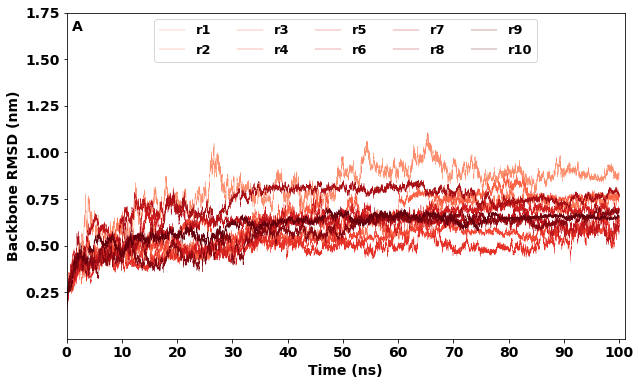

In [29]:
# R_open mdtraj RMSD
# v1/v2(LNC - YRL)  98-168  原子781-1332
# v3(PNN - RQA)   274-303   原子2129-2357
# α1(NMV-QSL) 68-85

#再计算  α1-α5(把V1到V5去除)  NMV-97  169-273  304-SIW  TIT-LTR  TFR-SEL
# V4(NSE-RND)    V5(DGG-GNE)
tied_name_list=tied_name
color= iter(cm.Reds(np.linspace(0.39, 1, 10)))  
datapath=close_data_path_R
save_path='v1v2-R_open-RMSD.jpg'
list1 = []
for i in range(781,1333):
    list1.append(i)
atom_indice = list1
picture_id='A'
drawRMSD1(atom_indice,datapath,tied_name_list,color,save_path,picture_id)

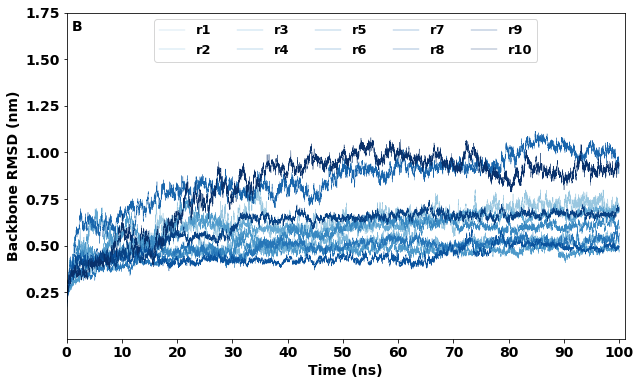

In [30]:
# H_open mdtraj RMSD
# v1/v2(LNC - YRL)  98-168  原子791-1361
# v3(PNN - RQA)   274-303   原子2153-2380
tied_name_list=tied_name
color= iter(cm.Blues(np.linspace(0.39, 1, 10)))
datapath=close_data_path_H
save_path='v1v2-H_open-RMSD.jpg'
list1 = []
for i in range(791,1362):
    list1.append(i)
atom_indice = list1
picture_id='B'
drawRMSD2(atom_indice,datapath,tied_name_list,color,save_path,picture_id)

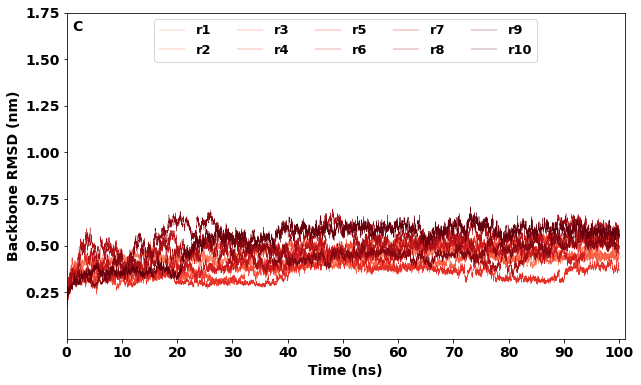

In [10]:
# R_close mdtraj RMSD  v1/v2
# v1/v2(LNC - YRL)  98-168  原子781-1332
# v3(PNN - RQA)   274-303   原子2129-2357
tied_name_list=tied_name
color= iter(cm.Reds(np.linspace(0.39, 1, 10)))
datapath=open_data_path_R
save_path='v1v2-R_close-RMSD.jpg'
picture_id='C'
list1 = []
for i in range(781,1333):
    list1.append(i)
atom_indice = list1
drawRMSD3(atom_indice,datapath,tied_name_list,color,save_path,picture_id)

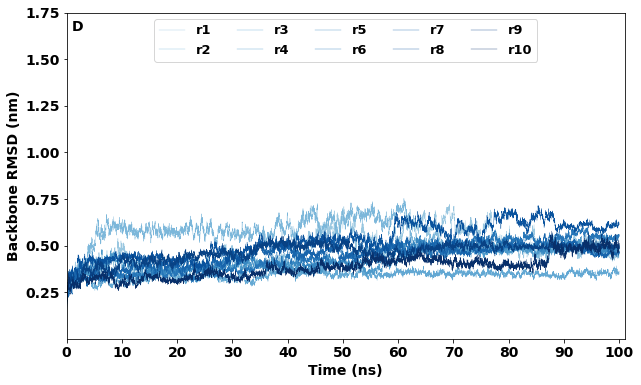

In [11]:
# H_close mdtraj RMSD
# v1/v2(LNC - YRL)  98-168  原子791-1361
# v3(PNN - RQA)   274-303   原子2153-2380
tied_name_list=tied_name
color= iter(cm.Blues(np.linspace(0.39, 1, 10))) #PuRd OrRd Greens
datapath=open_data_path_H
save_path='v1v2-H_close-RMSD.jpg'
list1 = []
for i in range(791,1362):
    list1.append(i)
atom_indice = list1
picture_id='D'
drawRMSD4(atom_indice,datapath,tied_name_list,color,save_path,picture_id)

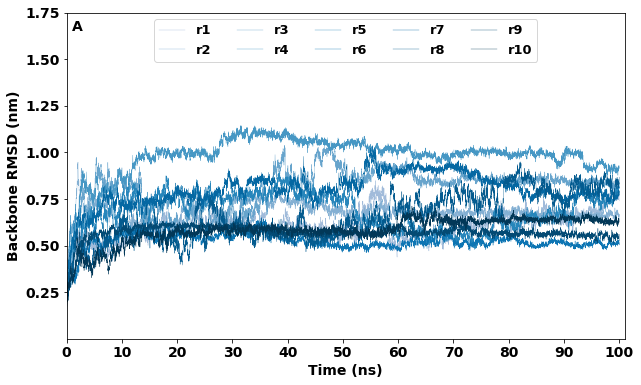

In [51]:
# R_open mdtraj RMSD
# v1/v2(LNC - YRL)  98-168  原子781-1332
# v3(PNN - RQA)   274-303   原子2129-2357
tied_name_list=tied_name
color= iter(cm.PuBu(np.linspace(0.39, 1, 10)))  
datapath=close_data_path_R
save_path='v3-R_open-RMSD.jpg'
list1 = []
for i in range(2129,2358):
    list1.append(i)
atom_indice = list1
picture_id='A'
drawRMSD1(atom_indice,datapath,tied_name_list,color,save_path,picture_id)

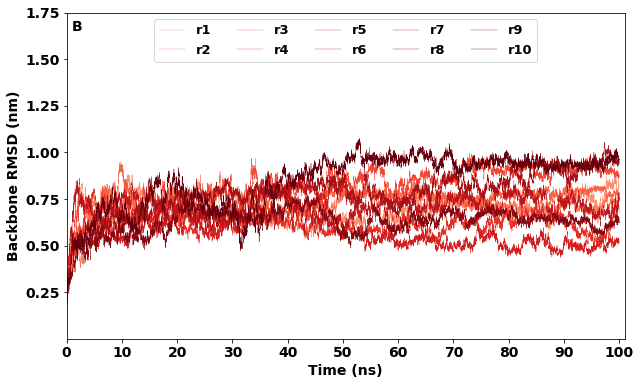

In [12]:
# H_open mdtraj RMSD
# v1/v2(LNC - YRL)  98-168  原子791-1361
# v3(PNN - RQA)   274-303   原子2153-2380
tied_name_list=tied_name
color= iter(cm.Reds(np.linspace(0.39, 1, 10)))
datapath=close_data_path_H
save_path='v3-H_open-RMSD.jpg'
list1 = []
for i in range(2153,2381):
    list1.append(i)
atom_indice = list1
picture_id='B'
drawRMSD2(atom_indice,datapath,tied_name_list,color,save_path,picture_id)

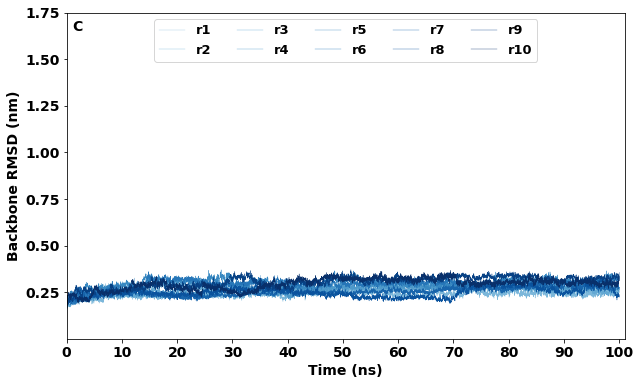

In [53]:
# R_close mdtraj RMSD  
# v1/v2(LNC - YRL)  98-168  原子781-1332
# v3(PNN - RQA)   274-303   原子2129-2357
tied_name_list=tied_name
color= iter(cm.Blues(np.linspace(0.39, 1, 10)))
datapath=open_data_path_R
save_path='v3-R_close-RMSD.jpg'
picture_id='C'
list1 = []
for i in range(2129,2358):
    list1.append(i)
atom_indice = list1
drawRMSD3(atom_indice,datapath,tied_name_list,color,save_path,picture_id)

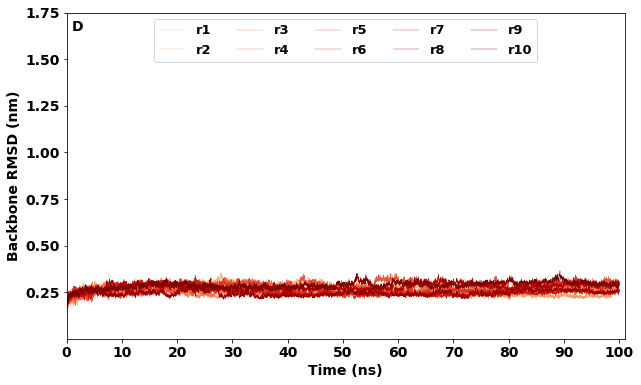

In [54]:
# H_close mdtraj RMSD
# v1/v2(LNC - YRL)  98-168  原子791-1361
# v3(PNN - RQA)   274-303   原子2153-2380
tied_name_list=tied_name
color= iter(cm.OrRd(np.linspace(0.39, 1, 10))) #PuRd OrRd Greens
datapath=open_data_path_H
save_path='v3-H_close-RMSD.jpg'
list1 = []
for i in range(2153,2381):
    list1.append(i)
atom_indice = list1
picture_id='D'
drawRMSD4(atom_indice,datapath,tied_name_list,color,save_path,picture_id)

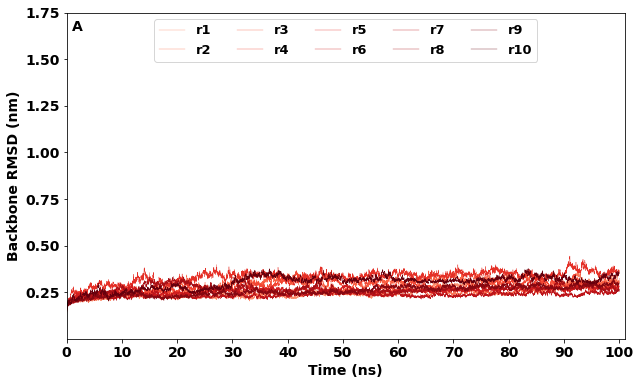

In [31]:
# r2 有问题
# R_open mdtraj RMSD
# 原子区域 542-780  1333-2128  2358-2877  3034-3374  3470-3608
tied_name_list=tied_name
color= iter(cm.Reds(np.linspace(0.39, 1, 10)))  
datapath=close_data_path_R
save_path='remove_v1-v5_R_open-RMSD.jpg'
list1 = []
for i1 in range(542,781):
    list1.append(i1)
for i2 in range(1333,2129):
    list1.append(i2)
for i3 in range(2358,2878):
    list1.append(i3)
for i4 in range(3034,3375):
    list1.append(i4)
for i5 in range(3470,3609):
    list1.append(i5)
# print(list1)
atom_indice = list1
picture_id='A'
drawRMSD1(atom_indice,datapath,tied_name_list,color,save_path,picture_id)

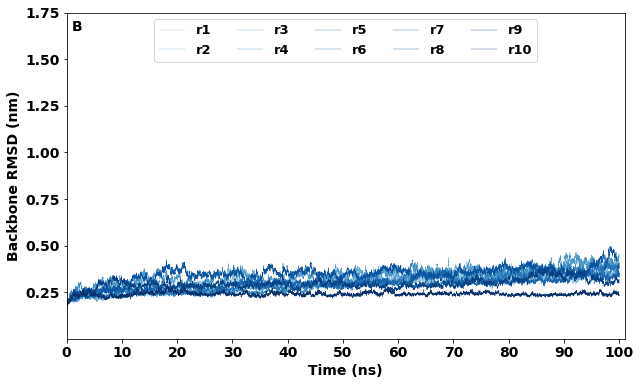

In [32]:
# H_open mdtraj RMSD
# 原子区域 552-790  1362-2152  2381-2911  2994-3338  3391-3529
tied_name_list=tied_name
color= iter(cm.Blues(np.linspace(0.39, 1, 10)))
datapath=close_data_path_H
save_path='remove_v1-v5_H_open-RMSD.jpg'
list1 = []
for i1 in range(552,791):
    list1.append(i1)
for i2 in range(1362,2153):
    list1.append(i2)
for i3 in range(2381,2912):
    list1.append(i3)
for i4 in range(2944,3339):
    list1.append(i4)
for i5 in range(3391,3530):
    list1.append(i5)
# print(list1)
atom_indice = list1
picture_id='B'
drawRMSD2(atom_indice,datapath,tied_name_list,color,save_path,picture_id)

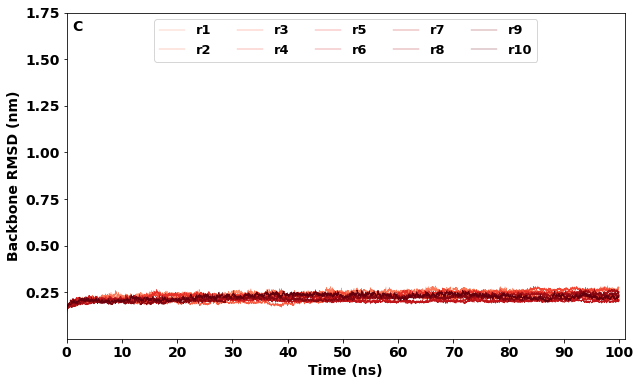

In [14]:
# R_close mdtraj RMSD  v1/v2
# 原子区域 542-780  1333-2128  2358-2877  3034-3374  3470-3608
tied_name_list=tied_name
color= iter(cm.Reds(np.linspace(0.39, 1, 10)))
datapath=open_data_path_R
save_path='remove_v1-v5_R_close-RMSD.jpg'
list1 = []
for i1 in range(542,781):
    list1.append(i1)
for i2 in range(1333,2129):
    list1.append(i2)
for i3 in range(2358,2878):
    list1.append(i3)
for i4 in range(3034,3375):
    list1.append(i4)
for i5 in range(3470,3609):
    list1.append(i5)
# print(list1)
atom_indice = list1
picture_id='C'
drawRMSD3(atom_indice,datapath,tied_name_list,color,save_path,picture_id)

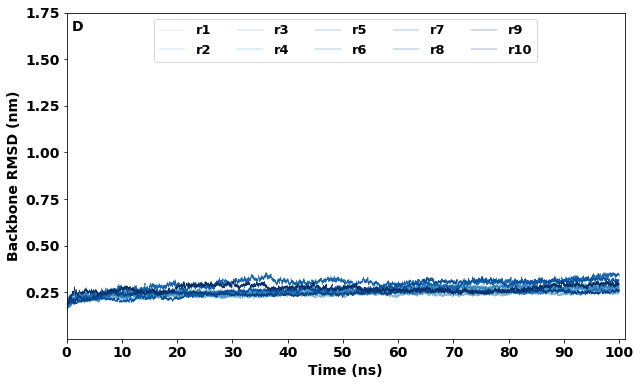

In [15]:
# H_close mdtraj RMSD
# 原子区域 552-790  1362-2152  2381-2911  2994-3338  3391-3529
tied_name_list=tied_name
color= iter(cm.Blues(np.linspace(0.39, 1, 10))) #PuRd OrRd Greens
datapath=open_data_path_H
save_path='remove_v1-v5_H_close-RMSD.jpg'
list1 = []
for i1 in range(552,791):
    list1.append(i1)
for i2 in range(1362,2153):
    list1.append(i2)
for i3 in range(2381,2912):
    list1.append(i3)
for i4 in range(2944,3339):
    list1.append(i4)
for i5 in range(3391,3530):
    list1.append(i5)
atom_indice = list1
picture_id='D'
drawRMSD4(atom_indice,datapath,tied_name_list,color,save_path,picture_id)